Imports

In [30]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

Load Data Set

In [31]:
X,Y = load_coffee_data()
print(X.shape, Y.shape)

(200, 2) (200, 1)


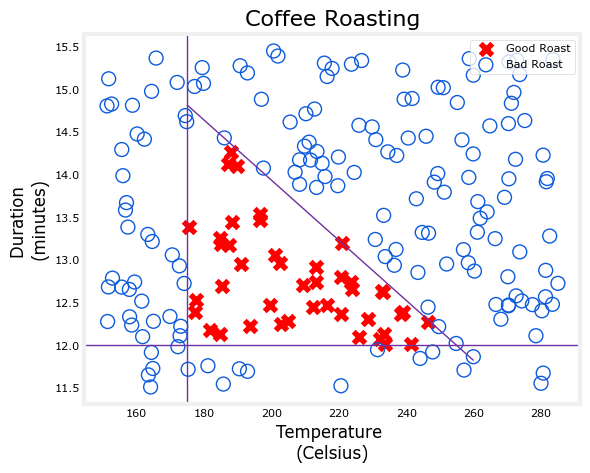

In [32]:
plt_roast(X,Y)

Normalize Data

- create a "Normalization Layer". Note, as applied here, this is not a layer in your model.
- 'adapt' the data. This learns the mean and variance of the data set and saves the values internally.
- normalize the data.  

In [33]:
print(
    f"Temperature Max - Min pre normalization: {np.max(X[:,0]):0.2f} - {np.min(X[:,0]):0.2f}")
print(
    f"Duration Max - Min pre normalization: {np.max(X[:,1]):0.2f} - {np.min(X[:,1]):0.2f}\n")

norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)
X_norm = norm_l(X)

print(
    f"Temperature Max - Min post normalization: {np.max(X[:,0]):0.2f} - {np.min(X[:,0]):0.2f}")
print(
    f"Duration Max - Min post normalization: {np.max(X[:,1]):0.2f} - {np.min(X[:,1]):0.2f}")


Temperature Max - Min pre normalization: 284.99 - 151.32
Duration Max - Min pre normalization: 15.45 - 11.51

Temperature Max - Min post normalization: 284.99 - 151.32
Duration Max - Min post normalization: 15.45 - 11.51


In [34]:
Xt = np.tile(X_norm, (1000, 1))
Yt = np.tile(Y, (1000, 1))
print(Xt.shape, Yt.shape)

(200000, 2) (200000, 1)


In [35]:
tf.random.set_seed(1234) # Used To Create Consistent Results Between Iterations 

model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name='layer_1'),
        Dense(1, activation='sigmoid', name='layer_2')
    ]
)

Preview of the model description

In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer_1 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

Adjust Parameters

- Weights => number_of_entries * number_of_outputs
- Biases => +1 bias for each neuron

In [37]:
L1_num_params = 2 * 3 + 3  # W1 parameters  + b1 parameters
L2_num_params = 3 * 1 + 1  # W2 parameters  + b2 parameters

print(f"L1_num_params = {L1_num_params}\nL2_num_params = {L2_num_params}")

L1_num_params = 9
L2_num_params = 4


In [38]:
W1, b1 = model.get_layer("layer_1").get_weights()
W2, b2 = model.get_layer("layer_2").get_weights()

print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1, "\n")
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[-0.38  0.13 -0.89]
 [ 0.38  0.35  0.24]] 
b1(3,): [0. 0. 0.] 

W2(3, 1):
 [[ 1.12]
 [ 0.02]
 [-0.62]] 
b2(1,): [0.]


In [39]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt, Yt, epochs=10,
)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 586us/step - loss: 0.3175
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 614us/step - loss: 0.1394
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 582us/step - loss: 0.1325
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 601us/step - loss: 0.1245
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 527us/step - loss: 0.1159
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 528us/step - loss: 0.0958
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 542us/step - loss: 0.0203
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 562us/step - loss: 0.0123
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 572us/step - loss: 0.0085
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 581us/step - loss: 0.0060


Update Weights after fitting

In [40]:
W1, b1 = model.get_layer("layer_1").get_weights()
W2, b2 = model.get_layer("layer_2").get_weights()

print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[-16.88   0.11  -9.99]
 [-14.22  -8.1   -0.14]] 
b1: [ -2.38 -10.17 -11.01]
W2:
 [[ 27.71]
 [-33.92]
 [-38.44]] 
b2: [-8.36]


Set Test Weights For Validation Process

In [41]:
W1 = np.array([[-8.94, 0.29, 12.89], [-0.17, -7.34, 10.79]])
b1 = np.array([-9.87, -9.82, 1.01])

W2 = np.array([[-31.38], [-27.86], [-32.79]])
b2 = np.array([15.54])

model.get_layer("layer_1").set_weights([W1, b1])
model.get_layer("layer_2").set_weights([W2, b2])

Verify Weights Replacement

In [42]:
W1, b1 = model.get_layer("layer_1").get_weights()
W2, b2 = model.get_layer("layer_2").get_weights()

print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[-8.94  0.29 12.89]
 [-0.17 -7.34 10.79]] 
b1: [-9.87 -9.82  1.01]
W2:
 [[-31.38]
 [-27.86]
 [-32.79]] 
b2: [15.54]


When the model is created you can make predictions

In [43]:
# Set a matrix with two cases of 'temperature' and 'duration' of the coffee roasting
X_test = np.array([[200, 13.9], [200, 17]])
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)

print(f"Predictions: {predictions}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predictions: [[9.63e-01]
 [3.03e-08]]


Conver probabilities to a decision

In [44]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    yhat[i] = 1 if predictions[i] >= 0.5 else 0

print(f"Decisions: {yhat}")

Decisions: [[1.]
 [0.]]


Making this shorter and simpler, taking advantage of the vectors use

In [45]:
yhat = (predictions >= 0.5).astype(int)
print(f"Decision: {yhat}")

Decision: [[1]
 [0]]


Layer plotting

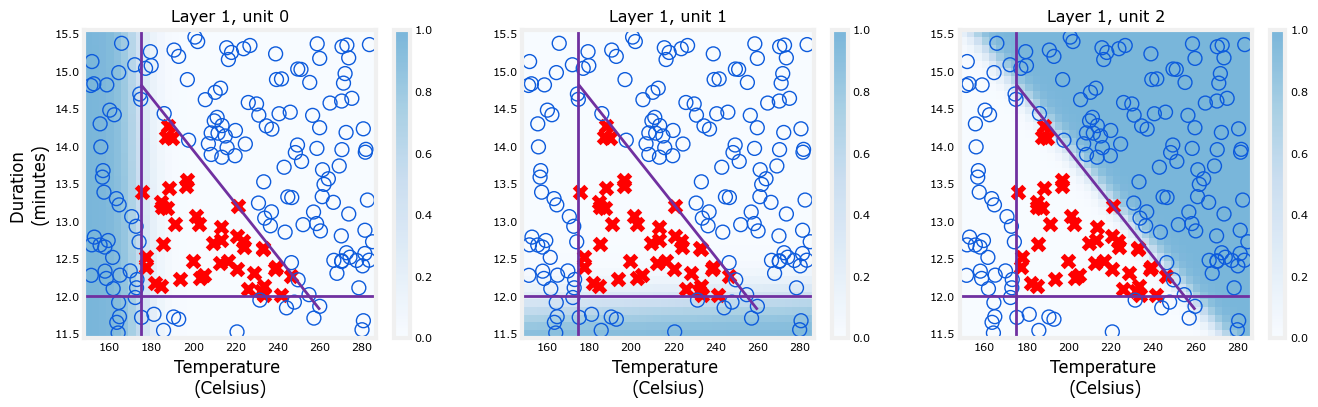

In [46]:
plt_layer(X,Y.reshape(-1,),W1,b1,norm_l)

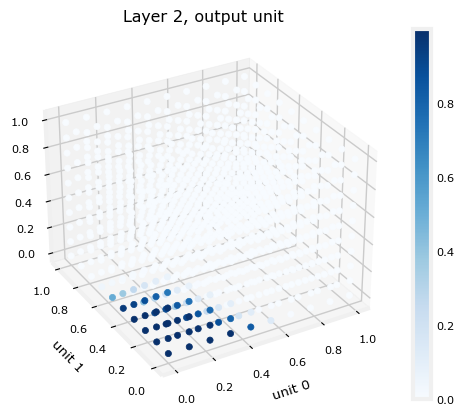

In [47]:
plt_output_unit(W2,b2)

Acting Network

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

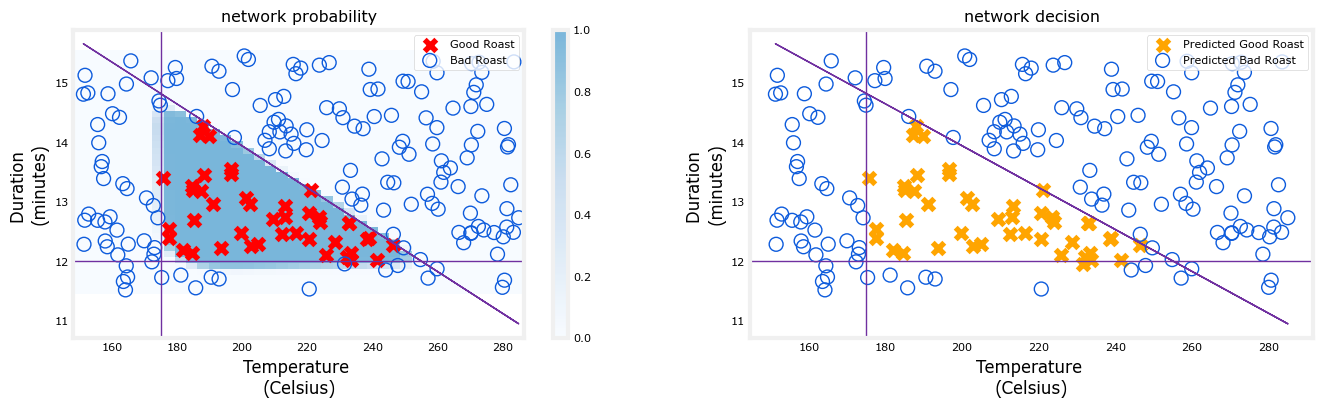

In [48]:
netf= lambda x : model.predict(norm_l(x))
plt_network(X,Y,netf)